In [89]:
from sklearn.tree         import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# SVM add
from sklearn.svm          import SVC

# Knn add
from sklearn.neighbors    import KNeighborsClassifier

# ensemble add
from sklearn.ensemble     import VotingClassifier
from sklearn.ensemble     import RandomForestClassifier


from sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler , Binarizer 
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score, cross_val_predict

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve , roc_curve

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# datasets
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml(data_id = 554)

In [5]:
type (mnist)

sklearn.utils.Bunch

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
mnist.data.shape

(70000, 784)

In [11]:
mnist.feature_names

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [12]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [13]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [14]:
mnist_df = pd.DataFrame(data = mnist.data,
                       columns = mnist.feature_names)


In [18]:
mnist_df['target'] = mnist.target

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [19]:
mnist_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [20]:
y_target  = mnist_df['target']
X_feature = mnist_df.drop(['target'], axis = 1, inplace = False)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: target, Length: 70000, dtype: object

In [70]:
X, y = mnist['data'], mnist ['target']
y = y.astype(np.int8)

In [71]:
type(X), type(y), X.shape, y.shape

(numpy.ndarray, numpy.ndarray, (70000, 784), (70000,))

In [72]:
reshape_img = X[1].reshape(28,28)

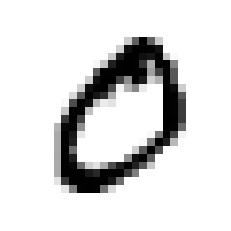

In [73]:
plt.imshow (reshape_img, cmap = matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [74]:
X_train, X_test, y_train, y_test = X[ : 60000], X[60000 :], y[ : 60000], y[60000 : ]

In [75]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [76]:
# 학습
shuffle = np.random.permutation(60000)
X_train, y_train = X_train[shuffle], y_train[shuffle]
shuffle

array([14960, 28728, 37473, ..., 34364, 54398, 13191])

In [77]:
# 테스트
X_test, y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int8))

In [78]:
dt = DecisionTreeClassifier(criterion = 'entropy',
                            max_depth = 8,
                            max_features = 32,
                            random_state = 100)

# 학습(fit)
dt.fit(X_train , y_train) 
dt_pred = dt.predict(X_test)

#### 예측 정확도

In [79]:
print('예측 정확도 : {0:.2f}'.format( accuracy_score(y_test , dt_pred ))) 

예측 정확도 : 0.75


In [80]:
# 이진분류를 위해서 (Binary Classifier)
# 7
y_train_seven = (y_train == 7)
y_train_seven 

array([False, False, False, ..., False, False, False])

In [83]:
# 확률적 경사하강법 (SQD) -> Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(random_state = 50)
sgd_model.fit(X_train, y_train_seven)

SGDClassifier(random_state=50)

In [85]:
sgd_model.predict([X[7]])

array([False])

In [86]:
# 교차검증 closs_val_score
scores = cross_val_score(sgd_model, X_train, y_train_seven, cv=5, scoring = 'accuracy')
scores

array([0.97333333, 0.98233333, 0.98166667, 0.98233333, 0.97475   ])

In [88]:
np.mean(scores)

0.9788833333333333

In [90]:
y_scores = cross_val_predict(sgd_model, X_train, y_train_seven, cv=5, method = 'decision_function')
y_scores

array([-66003.47516415, -29831.67819273, -40048.93019354, ...,
        -8116.9464465 , -15327.53326713,   -397.80675602])

In [92]:
precision, recall, thresholds = precision_recall_curve(y_train_seven, y_scores)
precision, recall, thresholds

(array([0.109764  , 0.10974841, 0.10975033, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99840383e-01, 9.99840383e-01, ...,
        3.19233839e-04, 1.59616919e-04, 0.00000000e+00]),
 array([-61277.62194307, -61276.97728582, -61273.35196004, ...,
         34395.76647886,  36472.8822616 ,  38609.52719252]))

In [93]:
precision.shape, recall.shape, thresholds.shape

((57078,), (57078,), (57077,))

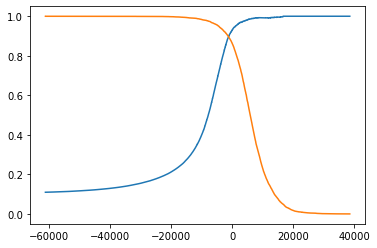

In [96]:

plt.plot(thresholds, precision[:-1], label='precision')

plt.plot(thresholds, recall[:-1], label='precision')

plt.show()

In [100]:
clf_model = RandomForestClassifier()
sgd_model.fit(X_train, y_train)
clf_pred = clf_model.predict(X_test)
print('예측 정확도 : {0:.2f}'.format( accuracy_score(y_test , clf_pred ))) 

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [101]:
import tensorflow as tf
tf.__version__  

'2.2.0'

In [102]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17482779680256248650,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14047150896837436920
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13119904815586326240
 physical_device_desc: "device: XLA_GPU device"]